In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
from skimage import io
import seaborn as sns
import math
import cv2
from sewar.full_ref import uqi, psnr, rmse, ssim
import pandas as pd
sns.set()
from scipy import signal
%matplotlib inline

In [2]:
img_paths=os.listdir('train_cleaned')
img_paths=['train_cleaned/'+x for x in img_paths]
cleaned_img=[cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in img_paths]

In [3]:
img_paths=os.listdir('train')
img_paths=['train/'+x for x in img_paths]
dirty_img=[cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in img_paths]

In [55]:
denoised=cleaned_img[4]
noisy=dirty_img[4]

In [64]:
def adaptive_thresholding(noisy_img):
    adaptive_th=cv2.adaptiveThreshold(noisy, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,30)
    return adaptive_th

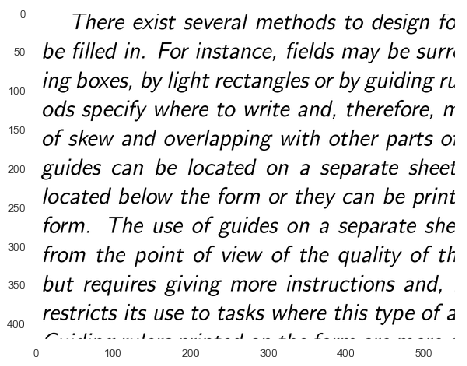

In [65]:
plt.figure(figsize=(10,6))
plt.imshow(denoised, cmap='gray')
plt.grid(b=None)

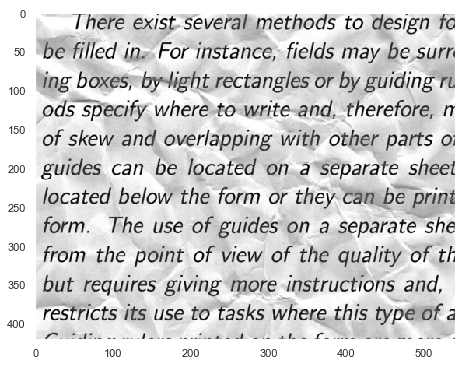

In [66]:
plt.figure(figsize=(10,6))
plt.imshow(noisy, cmap='gray')
plt.grid(b=None)

In [67]:
adaptive_th=adaptive_thresholding(noisy)

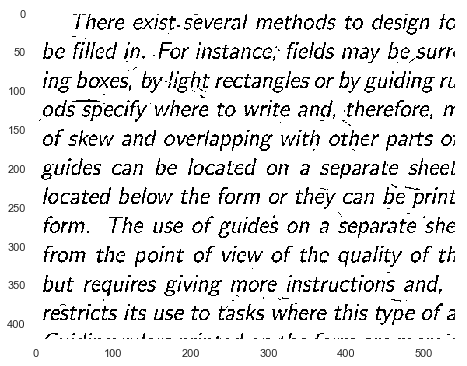

In [68]:
plt.figure(figsize=(10,6))
plt.imshow(adaptive_th, cmap='gray')
plt.grid(b=None)

In [72]:
rmse(adaptive_th, denoised)

31.692617464697808

### Save the results on S3 bucket

In [ ]:
import boto3

# Specify the name of the bucket
bucket_name = "denoise-docs"

s3 = boto3.client("s3")

# Local file that need to be uploaded
filename = 'output.png'

# Upload result on S3 bucket
s3.upload_file(
    Bucket = bucket_name,
    Filename=filename,
    Key=filename
)